Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**.

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Considera la posibilidad de incluir una tabla de contenidos al inicio de tu proyecto. Esto no solo mejorará la estructura y presentación de tu análisis, sino que también facilitará la navegación y comprensión de los distintos temas tratados, especialmente para proyectos extensos con múltiples secciones y subsecciones. Una tabla de contenidos bien organizada puede mejorar significativamente la experiencia del lector y destacar la profesionalidad de tu trabajo.
</div>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [ ]:
# Cargar del archivo CSV
df = pd.read_csv("flavors_of_cacao.csv")

In [ ]:
# Paso 1: Preprocesamiento de datos
# Eliminar filas con valores nulos en las columnas 'Broad Bean Origin' y 'Rating'
# Filter the DataFrame to include only the desired columns
df_subset = df[['Broad Bean Origin', 'Rating']]

# Apply bfill to the selected columns
df_subset_filled = df_subset.bfill()
df_subset_filled = df_subset.bfill().ffill()

# Update the original DataFrame with the filled values
df_cleaned = df.copy()  # Create a copy of the original DataFrame
df_cleaned[['Broad Bean Origin', 'Rating']] = df_subset_filled  # Update the specified columns

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

He revisado tu código de preprocesamiento de datos y quisiera hacer algunas observaciones sobre el método que estás utilizando para manejar los valores faltantes.

### Uso de `bfill` y `ffill` en datos no secuenciales:

- **Apropiado para series de tiempo:** Los métodos `bfill` (backfill) y `ffill` (forward fill) son técnicas de imputación que rellenan los valores faltantes utilizando los valores siguientes o anteriores en el conjunto de datos. Estos métodos son más adecuados cuando los datos tienen una estructura secuencial o temporal, donde se asume que los valores adyacentes tienen una relación lógica o continuidad en el tiempo.

- **No adecuado en datos no secuenciales:** En tu caso, estás aplicando `bfill` y `ffill` a datos que no son de series de tiempo, específicamente en las columnas 'Broad Bean Origin' y 'Rating'. Esto puede introducir sesgos o imputaciones incorrectas, ya que no hay garantía de que el valor siguiente o anterior sea un sustituto válido para el dato faltante.

### Imputación simple por media o moda:

- **Alternativas sencillas:** La imputación de valores faltantes utilizando la **media** (para variables numéricas) o la **moda** (para variables categóricas) es una técnica simple que puede ser más apropiada en algunos casos. Esto permite reemplazar los valores faltantes con un estimador central de la distribución de los datos.

- **Limitaciones:** Sin embargo, esta técnica también tiene limitaciones, ya que puede reducir la variabilidad de los datos y no considera las posibles relaciones entre variables.

### Recomendaciones para mejorar la imputación de datos:

- **Uso de `SimpleImputer`:** Para una solución más estructurada, te sugiero utilizar la clase `SimpleImputer` de **scikit-learn**, que facilita la imputación de valores faltantes con estrategias como la media, la mediana o la moda de forma consistente y reproducible.

- **Explorar `KNNImputer`:** Para mejorar aún más la imputación, podrías investigar el uso de `KNNImputer`, que imputa los valores faltantes basándose en los valores de los vecinos más cercanos. Esto tiene en cuenta la similitud entre observaciones y puede proporcionar imputaciones más precisas.

- **Imputación condicional o multivariante:** Otra alternativa es la imputación multivariante o condicional, donde se utilizan modelos estadísticos para predecir los valores faltantes basándose en otras variables del conjunto de datos. Esto puede capturar mejor las relaciones entre variables y ofrecer imputaciones más realistas.

### Consideraciones finales:

- **Análisis del patrón de valores faltantes:** Antes de decidir el método de imputación, es importante analizar el patrón y la naturaleza de los valores faltantes. Si los datos faltantes no son aleatorios, puede ser necesario ajustar el enfoque de imputación.

- **Validación del método de imputación:** Independientemente del método elegido, es recomendable validar su impacto en el análisis posterior. Esto puede incluir comparar estadísticas descriptivas antes y después de la imputación, o evaluar cómo afecta a los modelos predictivos.

¡Sigue explorando estas técnicas para mejorar la calidad de tus análisis! 😊
</div>


In [ ]:
df_cleaned.isnull().sum().sum()

1

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
df_cleaned.isnull().sum().sum()

0

In [ ]:
# Convertir 'Cocoa Percent' a tipo float
#df_cleaned['Cocoa Percent'] = df_cleaned['Cocoa Percent'].astype(float)
df_cleaned['Cocoa Percent'] = df_cleaned['Cocoa Percent'].str.rstrip('%').astype(float)

<ipython-input-8-c5b79160c719>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cocoa Percent'] = df_cleaned['Cocoa Percent'].str.rstrip('%').astype(float)


In [ ]:
# Filtrar los orígenes seleccionados
selected_origins = ['Mexico', 'Colombia', 'Ghana', 'Nigeria', 'Cameroon', 'Madagascar', 'Togo', 'Uganda', 'Sierra Leone']
df_filtered = df_cleaned[df_cleaned['Broad Bean Origin'].isin(selected_origins)]

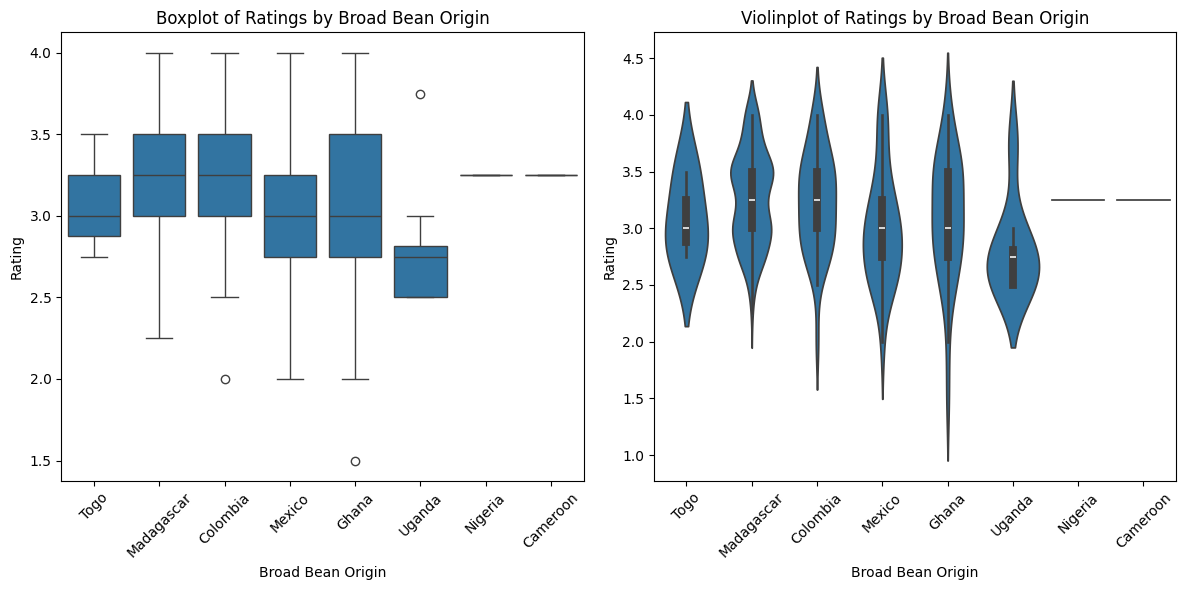

In [ ]:
# Paso 2: Análisis exploratorio de datos (EDA)
# Boxplot y Violinplot de la columna 'Rating' por 'Broad Bean Origin'
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Broad Bean Origin', y='Rating', data=df_filtered)
plt.title('Boxplot of Ratings by Broad Bean Origin')
plt.xticks(rotation=45)

# Violinplot
plt.subplot(1, 2, 2)
sns.violinplot(x='Broad Bean Origin', y='Rating', data=df_filtered)
plt.title('Violinplot of Ratings by Broad Bean Origin')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Sería valioso incluir breves conclusiones intermedias en tu análisis. Esto ayudará a resumir y clarificar tus hallazgos paso a paso, haciendo tu trabajo más comprensible y estructurado.
</div>

In [ ]:
# Paso 3: Pruebas de normalidad y homogeneidad de varianzas
# Prueba de Shapiro-Wilk para normalidad por grupo, solo para grupos con al menos 3 datos
shapiro_results = df_filtered.groupby('Broad Bean Origin')['Rating'].apply(lambda x: stats.shapiro(x) if len(x) >= 3 else np.nan)

# Filtrar los resultados de Shapiro-Wilk para mostrar solo los grupos con suficientes datos
valid_shapiro_results = shapiro_results.dropna()

# Prueba de Levene para homogeneidad de varianzas, considerando solo grupos con suficientes datos para Shapiro-Wilk
levene_test = stats.levene(*[group['Rating'].values for name, group in df_filtered.groupby('Broad Bean Origin') if name in valid_shapiro_results.index])

print("Resultados de Shapiro-Wilk por grupo (solo grupos con al menos 3 datos):\n", valid_shapiro_results)
print("\nResultado del test de Levene (considerando solo grupos con suficientes datos para Shapiro-Wilk):\n", levene_test)

Resultados de Shapiro-Wilk por grupo (solo grupos con al menos 3 datos):
 Broad Bean Origin
Colombia         (0.9545748064535984, 0.10902000438896237)
Ghana           (0.9383162041722667, 0.060699379353450905)
Madagascar    (0.9439386959360917, 1.4686930431221602e-05)
Mexico          (0.9323819690424566, 0.056821522505691675)
Togo              (0.9642857142857142, 0.6368868450289689)
Uganda          (0.7534378926704877, 0.008914856899653557)
Name: Rating, dtype: object

Resultado del test de Levene (considerando solo grupos con suficientes datos para Shapiro-Wilk):
 LeveneResult(statistic=0.8732318081545363, pvalue=0.49958594320963423)


In [ ]:
!pip install patsy
!pip install statsmodels

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Paso 4: Análisis ANOVA
# Ajustar un modelo OLS y realizar ANOVA
model = ols('Rating ~ C(Q("Broad Bean Origin"))', data=df_filtered).fit()
anova_results = anova_lm(model)

print("\nResultados del ANOVA:\n", anova_results)


Resultados del ANOVA:
                               df     sum_sq   mean_sq         F    PR(>F)
C(Q("Broad Bean Origin"))    7.0   3.370764  0.481538  2.422015  0.020382
Residual                   253.0  50.300692  0.198817       NaN       NaN


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Es importante evitar tener comandos `!pip install` directamente dentro del cuerpo de tu código, como en:

```python
  !pip install patsy !pip install statsmodels
```

En lugar de esto, preferimos que uses una **magic cell** (`%pip install ...`) al inicio del notebook para garantizar que las dependencias se instalen correctamente y no se mezclen con el flujo lógico del código. También, recuerda que **todos los imports deben colocarse al inicio del notebook**, para mantener el código bien organizado y fácilmente legible. Esto ayuda a identificar todas las dependencias necesarias desde el principio.

El fragmento de código podría verse así:

```python
# Magic cell para la instalación de librerías
%pip install patsy statsmodels

# Imports al inicio del notebook
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
De esta forma, el flujo del notebook será más claro y limpio. ¡Sigamos mejorando la estructura de tu código! 😊
```
</div>

In [ ]:
from scipy.stats import levene

# Definir el valor de alpha para la significancia estadística
alpha = 0.05

# Agrupar los datos por 'Broad Bean Origin' (origen del cacao)
groups = [group['Rating'].values for name, group in df_filtered.groupby('Broad Bean Origin')]

# Aplicar la prueba de Levene para homogeneidad de varianzas usando la mediana
levene_test = levene(*groups, center='median')

# Imprimir resultados
print("Prueba de Levene para Homogeneidad de Varianzas:")
print(f"Estadístico de prueba: {levene_test.statistic:.4f}")
print(f"Valor p: {levene_test.pvalue:.4f}")

# Interpretación del resultado
if levene_test.pvalue > alpha:
    print(f"Resultado: No se rechaza la hipótesis nula (p > {alpha}). Las varianzas son homogéneas.\n")
else:
    print(f"Resultado: Se rechaza la hipótesis nula (p <= {alpha}). Las varianzas no son homogéneas.\n")


Prueba de Levene para Homogeneidad de Varianzas:
Estadístico de prueba: 1.1429
Valor p: 0.3367
Resultado: No se rechaza la hipótesis nula (p > 0.05). Las varianzas son homogéneas.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo aplicando las pruebas de Shapiro-Wilk y Levene para verificar las suposiciones del ANOVA. Estos son pasos críticos para asegurar la validez de los resultados.
</div>


<ipython-input-14-aef224219ab6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_results['PR(>F)'][0] < 0.05:


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  Cameroon   Colombia   -0.025    1.0 -1.4048 1.3548  False
  Cameroon      Ghana  -0.1591    1.0 -1.5424 1.2243  False
  Cameroon Madagascar   0.0155    1.0  -1.352 1.3831  False
  Cameroon     Mexico  -0.2417 0.9995  -1.627 1.1437  False
  Cameroon    Nigeria      0.0    1.0 -1.9274 1.9274  False
  Cameroon       Togo  -0.1667    1.0 -1.7404  1.407  False
  Cameroon     Uganda  -0.4375 0.9834  -1.883  1.008  False
  Colombia      Ghana  -0.1341  0.906 -0.4546 0.1864  False
  Colombia Madagascar   0.0405 0.9996 -0.2029 0.2839  False
  Colombia     Mexico  -0.2167 0.4759 -0.5458 0.1125  False
  Colombia    Nigeria    0.025    1.0 -1.3548 1.4048  False
  Colombia       Togo  -0.1417 0.9995 -0.9575 0.6742  False
  Colombia     Uganda  -0.4125 0.2515 -0.9403 0.1153  False
     Ghana Madagascar   0.1746 0.4636 -0

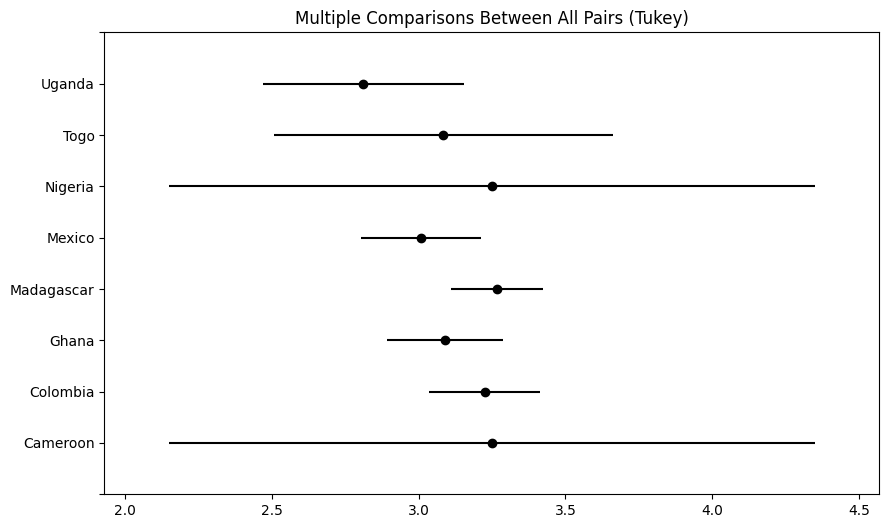

In [ ]:
# Paso 5: Prueba post-hoc (si ANOVA es significativo)
if anova_results['PR(>F)'][0] < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df_filtered['Rating'], df_filtered['Broad Bean Origin'])
    print(tukey)

    # Visualizar resultados de Tukey
    tukey.plot_simultaneous()
    plt.show()

El análisis ANOVA mostró diferencias significativas entre los orígenes de cacao en términos de calificación promedio (p = 0.0204). Sin embargo, las pruebas post-hoc (Tukey HSD) no identificaron diferencias significativas entre pares de orígenes. Esto sugiere que, aunque existen diferencias generales entre los orígenes, las calificaciones dentro de los grupos presentan una gran variabilidad, lo que dificulta la identificación de diferencias específicas entre los países. Una mayor investigación sobre la variabilidad de los datos y otros enfoques post-hoc podrían ser necesarios para obtener conclusiones más detalladas.

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Al escribir conclusiones finales, condisera las siguientes pauta para que reflejen efectivamente tus hallazgos y decisiones.
<ul>
    <li><b>Resumen de los Hallazgos Clave:</b> Incluye brevemente tus descubrimientos más importantes.</li>
    <li><b>Impacto de tus Elecciones de Procesamiento de Datos:</b> Reflexiona sobre cómo tus decisiones influyeron en los resultados.</li>
    <li><b>Relación con los Objetivos Iniciales:</b> Vincula tus hallazgos con los objetivos del proyecto.</li>
    <li><b>Relevancia de los Hallazgos:</b> Discute la importancia de tus resultados para la empresa o usuarios.</li>
    <li><b>Sugerencias y Recomendaciones:</b> Ofrece cualquier consejo basado en tus análisis.</li>
    <li><b>Reflexiones Finales:</b> Concluye con tus pensamientos finales y aprendizajes del proyecto.</li>
</ul>
Recuerda que una conclusión efectiva resume tus hallazgos y proporciona insights y reflexiones sobre su impacto y relevancia. ¡Buena suerte en la etapa final!
</div>


# Comentario Final del Revisor

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Un **intervalo de confianza** es un rango de valores que, basado en los datos de la muestra, se espera que contenga el valor verdadero de la media poblacional con cierto nivel de confianza (por ejemplo, 95%). En este gráfico, los intervalos de confianza te permiten ver cuán seguros estamos de que la media estimada para cada grupo es representativa de la media real de ese grupo.

Sería muy interesante incluir una conclusión sobre los intervalos de confianza porque te ayudan a determinar si las diferencias entre las medias de los grupos son estadísticamente significativas. Si los intervalos de confianza entre dos grupos no se solapan, podrías concluir que las medias son significativamente diferentes. Esto agrega profundidad al análisis, ya que no solo estás reportando las medias, sino también evaluando la precisión de esas estimaciones y las diferencias entre los grupos de una manera más rigurosa.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto va **en buen camino**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y aplicación de ANOVA. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Procesamiento de datos:** Has limpiado y preparado adecuadamente los datos, asegurando que los grupos tengan el tamaño mínimo requerido para las pruebas estadísticas.
- **Aplicación de ANOVA:** Tu análisis de varianza está bien fundamentado y correctamente implementado.
- **Pruebas de suposiciones:** Es positivo ver que has verificado las suposiciones de normalidad y homogeneidad de varianzas, lo cual es esencial para un análisis ANOVA.

#### Áreas para Seguir Investigando:

- **Mejoras en visualización:** Podrías mejorar las descripciones en los gráficos, agregando más información sobre el contexto de los datos para facilitar la interpretación.

#### Recomendación Adicional:
Es completamente normal que en todas las pruebas de Tukey hayas obtenido resultados 'False', ya que en este ejercicio no se esperaban diferencias significativas entre los grupos. Esto es parte del proceso de aprendizaje, y lo importante es que has aplicado correctamente los métodos y herramientas necesarias para hacer estas evaluaciones.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊
</div>
